In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string
import nltk

nltk.download('punkt')

datasets = ['ayam', 'ikan', 'kambing', 'sapi', 'telur', 'tahu', 'tempe', 'udang']
dfs = [pd.read_csv(f'./indo-food/dataset-{food}.csv') for food in datasets]
recipes = pd.concat(dfs)

recipes.dropna(inplace=True)
recipes.info()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Erle_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
Index: 15113 entries, 0 to 1964
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        15113 non-null  object
 1   Ingredients  15113 non-null  object
dtypes: object(2)
memory usage: 354.2+ KB


In [2]:
# FOr all double-worded ingredients, take precaution so that we will catch the double words
recipes['Ingredients'] = recipes['Ingredients'].str.replace('(B|b)awang\s(P|p)utih', 'bawangputih', regex=True)
recipes['Ingredients'] = recipes['Ingredients'].str.replace('(B|b)awang\s(M|m)erah', 'bawangmerah', regex=True)
recipes['Ingredients'] = recipes['Ingredients'].str.replace('(D|d)aun\s(B|b)awang', 'daunbawang', regex=True)
recipes['Ingredients'] = recipes['Ingredients'].str.replace('(D|d)aun\s(J|j)eruk', 'daunjeruk', regex=True)

In [3]:
# Function to tokenize and clean text
def process_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    return tokens

recipes['ingredients_clean'] = recipes['Ingredients'].apply(process_text)
all_ingredients = [ingredient for sublist in recipes['ingredients_clean'].tolist() for ingredient in sublist]

punctuation = list(string.punctuation)
filtered_ingredients = [ingredient for ingredient in all_ingredients if ingredient not in punctuation]

In [4]:
# Calculate word frequencies
freq_dist = FreqDist(filtered_ingredients)

n_most_common = 150 
most_common_words = freq_dist.most_common(n_most_common)

In [5]:
most_common_words

[('secukupnya', 21980),
 ('buah', 17238),
 ('siung', 16527),
 ('bawangputih', 13497),
 ('garam', 13370),
 ('cabe', 10580),
 ('bawangmerah', 10219),
 ('gula', 8489),
 ('merah', 8067),
 ('iris', 6774),
 ('butir', 6502),
 ('air', 6418),
 ('potong', 6306),
 ('minyak', 6041),
 ('bubuk', 5994),
 ('rawit', 5980),
 ('kecap', 5456),
 ('daun', 5387),
 ('goreng', 5101),
 ('ruas', 4831),
 ('ayam', 4778),
 ('tomat', 4692),
 ('telur', 4682),
 ('lembar', 4464),
 ('tepung', 4080),
 ('manis', 4024),
 ('batang', 3799),
 ('jahe', 3770),
 ('saus', 3742),
 ('merica', 3731),
 ('salam', 3620),
 ('selera', 3595),
 ('bawang', 3548),
 ('lada', 3408),
 ('daging', 3368),
 ('daunbawang', 3270),
 ('dan', 3224),
 ('penyedap', 3199),
 ('sesuai', 3152),
 ('kunyit', 3109),
 ('tahu', 3038),
 ('besar', 3024),
 ('kecil', 3003),
 ('daunjeruk', 2996),
 ('kemiri', 2962),
 ('cabai', 2918),
 ('untuk', 2879),
 ('bumbu', 2876),
 ('ketumbar', 2796),
 ('halus', 2740),
 ('sapi', 2665),
 ('geprek', 2638),
 ('lengkuas', 2632),
 ('tem

In [6]:
most_common_spices = translated_list = [
    # ('garlic', 'bawang putih', 13869),
    # ('shallot', 'bawang merah', 10302),
    # ('spring onion', 'daun bawang', 3363),
    # ('onion', 'bombay/bombai', 2785),
    ('kaffir lime leaf', 'daun jeruk', 3006),
    
    ('chili', 'cabe/cabai', 13708),
    ('rawit', 'rawit', 6040),
    
    ('pepper', 'lada/merica', 7492), # Lada hitam / putih: black/white pepper. Lada is when it is a powder, merica is the full seeds
    ('ginger', 'jahe', 3858),
    ('salam', 'salam', 3629),
    ('turmeric', 'kunyit', 3119),
    ('kemiri', 'kemiri', 2970),
    ('coriander', 'ketumbar', 2821),
    ('galangal', 'lengkuas', 2639),
    ('coconut', 'santan/santen', 1714),
    ('lemongrass', 'serai/sereh', 2865),
    ('tamarind paste', 'asam', 880),
    ('nutmeg', 'pala', 811),
    ('peanut', 'kacang', 738)
]

In [7]:
common_spices_indonesian = [spice.replace(' ', '') for spice_names in most_common_spices for spice in spice_names[1].split('/')]
common_spices_indonesian

['daunjeruk',
 'cabe',
 'cabai',
 'rawit',
 'lada',
 'merica',
 'jahe',
 'salam',
 'kunyit',
 'kemiri',
 'ketumbar',
 'lengkuas',
 'santan',
 'santen',
 'serai',
 'sereh',
 'asam',
 'pala',
 'kacang']

In [8]:
recipes_with_common_spices = recipes[recipes['Ingredients'].str.contains('|'.join(common_spices_indonesian), case=False)]
recipes_with_common_spices = recipes_with_common_spices.reset_index()
recipes_with_common_spices['ingredients_clean'] = recipes_with_common_spices['ingredients_clean'].apply(lambda x: [word for word in x if word in common_spices_indonesian])
recipes_with_common_spices['Title'] = recipes_with_common_spices['Title'].str.lower()


In [9]:
recipes_with_common_spices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13873 entries, 0 to 13872
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              13873 non-null  int64 
 1   Title              13873 non-null  object
 2   Ingredients        13873 non-null  object
 3   ingredients_clean  13873 non-null  object
dtypes: int64(1), object(3)
memory usage: 433.7+ KB


In [10]:
duplicate_recipes = recipes_with_common_spices[recipes_with_common_spices.duplicated(subset=['Title'])]
duplicate_recipes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4721 entries, 17 to 13872
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              4721 non-null   int64 
 1   Title              4721 non-null   object
 2   Ingredients        4721 non-null   object
 3   ingredients_clean  4721 non-null   object
dtypes: int64(1), object(3)
memory usage: 184.4+ KB


In [11]:
unique_recipes = recipes_with_common_spices #.drop_duplicates(subset=['Title'])
# unique_recipes = unique_recipes.reset_index()
unique_recipes.info()
unique_recipes['Title'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13873 entries, 0 to 13872
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              13873 non-null  int64 
 1   Title              13873 non-null  object
 2   Ingredients        13873 non-null  object
 3   ingredients_clean  13873 non-null  object
dtypes: int64(1), object(3)
memory usage: 433.7+ KB


9152

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(unique_recipes['Title'])

# Apply t-SNE to reduce the dimensionality
tsne = TSNE(n_components=2, random_state=42, init='random')
tsne_result = tsne.fit_transform(tfidf_matrix)

In [13]:
tsne_recipes = pd.DataFrame(tsne_result, columns=['tsne_1', 'tsne_2'])
tsne_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13873 entries, 0 to 13872
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tsne_1  13873 non-null  float32
 1   tsne_2  13873 non-null  float32
dtypes: float32(2)
memory usage: 108.5 KB


In [14]:

print(len(tsne_recipes))
len(unique_recipes)

13873


13873

In [34]:
unique_recipes[unique_recipes['ingredients_clean'].apply(lambda x: 'kacang' in x)]

,index,Title,Ingredients,ingredients_clean
22,23,ayam kacang panjang saus hoisin,Bahan Daging lembar paha atas/dada ayam kecap ...,"[kacang, jahe]"
50,53,somay ayam bumbu kacang,dada ayam Kulit lumpia instan terigu kanji siu...,"[merica, kacang, kacang, cabe]"
79,82,ayam asam manis,iris ayam (potong kecilsesuai selera) Secukupn...,"[cabe, kacang]"
103,106,soto ayam kediri,ekor ayam (ayam kampung lebih enak) ceker atau...,"[serai, salam, daunjeruk, lengkuas, santan, sa..."
149,154,gulai ayam,ayam kentang kacang panjang ruas jahe ruas len...,"[kacang, jahe, lengkuas, daunjeruk, salam, san..."
...,...,...,...,...
13813,1897,tumis udang asam manis,Udang Kacang Panjang Siung bawangmerah Siung b...,"[kacang, cabe, rawit]"
13819,1903,udang tumis sayur,"udang (buang kepala, rendam air garam) ikat ka...","[kacang, merica, cabai, rawit, cabai, jahe]"
13831,1915,gulai udang jumbo,udang jumbo secukupnya Kacang panjang kentang ...,"[kacang, serai, daunjeruk, salam, santan, jahe..."
13836,1921,basoy udang,ons udang (optional) buah tahu yang sudah digo...,"[lada, asam, cabe, daunjeruk, santan, kacang]"


In [35]:
tsne_recipes[tsne_recipes['ingredients'].apply(lambda x: 'kacang' in x)]

,level_0,index,tsne_1,tsne_2,cluster,recipe,ingredients,distance
46,31,8412,-6.553396,65.668427,0,cumi isi tahu telur asam manis,"[jahe, kacang, merica]",5.266719
55,87,9432,0.556304,-45.399899,1,gulai takate (tahu-kacang-telur),"[kacang, santan, cabe, kemiri, lengkuas, salam...",0.402827
56,57,7082,-0.242016,-44.444000,1,tahu telur bumbu kacang,"[kacang, cabe, rawit]",1.002996
57,63,7444,-0.242018,-44.443962,1,tahu telur bumbu kacang,"[cabe, rawit, kacang]",1.003031
58,69,7192,-0.242018,-44.443962,1,tahu telur bumbu kacang,[kacang],1.003031
...,...,...,...,...,...,...,...,...
13620,13585,11431,-6.169882,-43.200359,193,ketoprak tempe,"[kacang, cabai, rawit]",3.725435
13653,13599,11656,-14.184903,-43.341679,193,sate tempe menjes,"[kacang, cabai, rawit]",5.610225
13664,13624,10257,-6.452897,-51.676888,193,tahu telur bumbu kacang bertaburan mikreskress...,[kacang],6.625818
13665,13641,7876,-6.452924,-51.677429,193,tahu telur bumbu kacang bertaburan mikreskress...,[kacang],6.626306


In [15]:
from sklearn.cluster import KMeans

n_clusters = 200
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
tsne_recipes['cluster'] = kmeans.fit_predict(tsne_recipes[['tsne_1', 'tsne_2']])

# Find cluster centers
cluster_centers = kmeans.cluster_centers_

C:\Users\Erle_\MyCode\my-code\data-echoes\.data-echoes\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
tsne_recipes['recipe'] = unique_recipes['Title']
tsne_recipes['ingredients'] = unique_recipes['ingredients_clean']
tsne_recipes = tsne_recipes.sort_values('cluster').reset_index()

In [17]:
print(tsne_recipes.head())
unique_recipes.head()

   index    tsne_1     tsne_2  cluster                       recipe  \
0   2055 -3.151822  76.061058        0           gurami masak kecap   
1   2879 -3.438335  73.770691        0            gurami asam manis   
2   2912 -8.462383  67.995201        0  ikan bawal saus pedas manis   
3   2968 -9.995465  71.260513        0        ikan bawal bun taucio   
4   2978 -3.462663  75.034019        0       gurami ricaala mamiqqq   

                         ingredients  
0         [ketumbar, kunyit, kemiri]  
1  [cabe, rawit, cabe, asam, merica]  
2                [cabe, rawit, lada]  
3                 [jahe, cabe, lada]  
4            [ketumbar, serai, cabe]  


,index,Title,Ingredients,ingredients_clean
0,0,ayam woku,Ekor Ayam Kampung (potong ) Buah Jeruk Nipis G...,"[kunyit, cabe, cabe, rawit, kemiri, sereh, salam]"
1,1,ayam goreng tulang lunak,ayam (dipotong sesuai selera jangan kecilya) b...,"[serai, daunjeruk, ketumbar, kunyit, kemiri]"
2,2,ayam cabai kawin,ayam buah cabai hijau besar buah cabai merah r...,"[cabai, cabai, rawit]"
3,3,ayam geprek,daging ayam (saya pakai fillet) Secukupnya gul...,"[cabe, rawit]"
4,4,minyak ayam,"kulit ayam lemaknya siung bawangputih kating, ...","[jahe, ketumbar]"


In [18]:
import numpy as np

# Get distances to each cluster center for each data point
distances_per_cluster = kmeans.transform(tsne_recipes[['tsne_1', 'tsne_2']])

# Get the smallest distance for each data point
distance = np.min(distances_per_cluster, axis=1)

tsne_recipes['distance'] = distance
center_recipes = tsne_recipes[['cluster', 'recipe', 'distance']].groupby('cluster').min()
center_recipes.head()

,recipe,distance
cluster,,
0,acar gurami,2.563680
1,baceman ayam tempe,0.402827
2,gami telur / telur balado pedas sambal tomat,0.179688
3,bakso balungan,0.438834
4,bihun telur gulung,0.122073


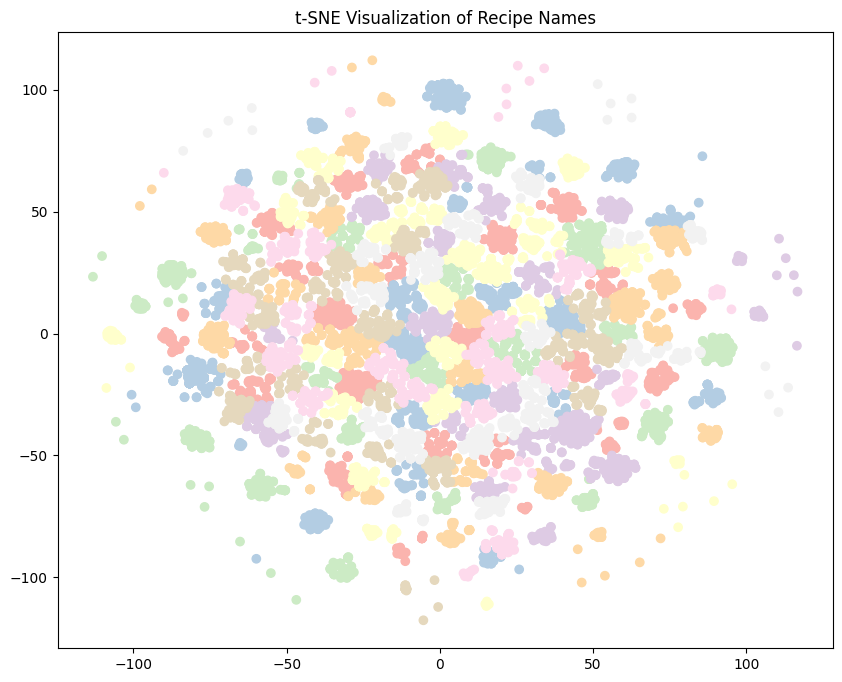

In [36]:
plt.figure(figsize=(10, 8))
plt.scatter(tsne_recipes['tsne_1'], tsne_recipes['tsne_2'], c=tsne_recipes['cluster'], cmap='Pastel1')

# Annotate cluster centers
# for center, label in zip(cluster_centers, center_recipes['recipe']):
#     plt.annotate(label, (center[0], center[1]), textcoords="offset points", xytext=(0, 0), ha='center', size=8)

plt.title('t-SNE Visualization of Recipe Names')
plt.show()

In [20]:
len(tsne_recipes)
tsne_recipes = tsne_recipes.sort_values(['cluster', 'distance']).reset_index()
tsne_recipes.head(20) #TODO: Ask Tara picture of recipes 

,level_0,index,tsne_1,tsne_2,cluster,recipe,ingredients,distance
0,7,3008,-8.344160,69.227539,0,ikan bawal saus tauco,"[jahe, cabe, rawit, cabe]",2.563680
1,20,2357,-8.344124,69.227188,0,ikan bawal saus tauco,"[cabe, cabe, rawit]",2.563887
2,5,2989,-7.565433,73.322174,0,ikan kue asam manis,"[cabai, lada]",2.644315
3,19,2822,-7.581950,73.357895,0,sop ikan kue,"[jahe, daunjeruk, serai, cabe, rawit, lada, asam]",2.683668
4,21,5227,-7.617129,73.374527,0,chai ji kue,[merica],2.713895
5,12,3056,-7.517216,73.436356,0,ikan kue bakar oven,"[merica, cabe, cabe, rawit]",2.728328
6,53,1843,-9.504931,69.641457,0,ikan bawal sambal mata kecap,[cabe],3.334812
7,44,2197,-9.514468,69.447250,0,ikan bawal bumbu kecap,[jahe],3.423353
8,32,2669,-9.358197,69.021904,0,penyet ikan bawal,"[cabe, jahe]",3.496484
9,2,2912,-8.462383,67.995201,0,ikan bawal saus pedas manis,"[cabe, rawit, lada]",3.572492


In [21]:
for i, center_label in enumerate(zip(cluster_centers, center_recipes['recipe'])):
    print(i, center_label[1])

0 acar gurami
1 baceman ayam tempe
2 gami telur / telur balado pedas sambal tomat
3 bakso balungan
4 bihun telur gulung
5 ayam bakar bumbu rujak
6 oily oseng/tumis buncis tempe kecap (🇮🇩)
7 ayam crispy
8 bakso tempe banget
9 ayam bakar suka-suka
10 ayam jamur barbecue
11 balado ikan cue tongkol
12 asam pedas ikan nila
13 age daging sapi
14 anak udang goreng /baby shrimp
15 ayam kecap/semur
16 asam pedas ikan lais
17 cilok ayam kuah
18 bacem pindang telur *endess*
19 nasi arab mandy kambing
20 arem arem isi wortel ayam kentang
21 cah jasakuwot (jagung, sawi, kubis, wortel dan telur)
22 ayam gulai kuning no santan
23 ayam brokoli saus mentega
24 balado dadar telur ayam
25 angeun lada
26 sate kambing maranggi
27 ayam crispy sambal matah
28 bakso auw (ayam, udang, wortel)
29 balado telur
30 ayam bakar istimewa dan sambal tomat
31 ayam coca cola
32 balado ikan sembilang
33 bakwan tempe/perkedel tempe
34 dadar telur makroni
35 balado telur rebon
36 ayam bacem
37 gulai bening non santan
38 ay

In [22]:
current_cluster = tsne_recipes[tsne_recipes['cluster'] == 30]
print(len(current_cluster))
current_cluster[['recipe', 'distance']].head(50)

100


,recipe,distance
2172,udang pokchoy rebus sambal bawang,1.554056
2173,ayam bakar istimewa dan sambal tomat,1.749891
2174,ikan bakar bumbu racik tempe dan sambal tomat,1.808745
2175,tempe kukus sambal tomat,1.944311
2176,tempe mercon sambal tomat,2.416175
2177,sambal tomat ikan nila,2.515267
2178,sambal tempe kukus,2.584873
2179,sambal tomat tahu tempe,2.597688
2180,telur rebus sambal tomat,2.719386
2181,sambal tomat telur rebus,2.719404


In [23]:
most_occurring_recipes = tsne_recipes['recipe'].value_counts().head(100)
most_occurring_recipes

recipe
tongseng kambing        166
sate kambing            103
sop daging sapi          90
gulai kambing            75
nasi kebuli              66
                       ... 
sate tempe               10
capcay udang             10
kering tempe teri        10
dadar telur cah toge      9
tahu aci                  9
Name: count, Length: 100, dtype: int64

In [24]:
most_occurring_tsne = tsne_recipes[tsne_recipes['recipe'].isin(most_occurring_recipes.keys())]
# most_occurring_tsne = most_occurring_tsne.reset_index()
cluster_per_most_occurring = most_occurring_tsne.groupby('recipe')['cluster'].max() # Take max, since all occurrences will have same cluster
cluster_per_most_occurring.head(100).keys()

Index(['asem-asem daging sapi', 'ayam geprek', 'ayam goreng',
       'ayam goreng lengkuas', 'ayam goreng mentega', 'ayam goreng tepung',
       'ayam katsu', 'ayam kecap', 'ayam lada hitam', 'ayam rica-rica',
       'ayam teriyaki', 'ayam woku', 'bacem tahu tempe', 'bakso ayam',
       'bakso sapi', 'bakwan udang', 'balado telur', 'balado udang',
       'beef yakiniku', 'capcay udang', 'dadar telur cah toge',
       'daging sapi lada hitam', 'gulai kambing', 'gurame asam manis',
       'kari kambing', 'kering tempe', 'kering tempe teri',
       'krengsengan kambing', 'mangut lele', 'martabak tahu', 'mendol tempe',
       'mie ayam', 'nasi goreng kambing', 'nasi goreng udang', 'nasi kebuli',
       'nugget tempe', 'opor ayam', 'orak arik telur', 'orek tempe',
       'orek tempe basah', 'oseng-oseng tempe',
       'oseng-oseng tempe kacang panjang', 'pepes tahu', 'pepes tahu ',
       'perkedel tahu', 'perkedel tempe', 'pindang ikan', 'pindang telur',
       'rawon sapi', 'rendang dagin

In [25]:
occurring_in_recipes = [
  ['asem-asem'],
  ['ayam', 'crispy'],
  ['ayam', 'geprek'],
  ['ayam goreng'],
  ['ayam', 'goreng', 'lengkuas'],
  ['ayam', 'goreng', 'mentega'],
  ['ayam', 'goreng', 'tepung'],
  ['ayam', 'katsu'],
  ['ayam', 'kecap'],
  ['ayam', 'lada', 'hitam'],
  ['ayam', 'rica-rica'],
  ['ayam', 'teriyaki'],
  ['ayam', 'woku'],
  ['bacem', 'tahu', 'tempe'],
  ['bakso', 'ayam'],
  ['bakso', 'sapi'],
  ['bakwan', 'udang'],
  ['balado', 'telur'],
  ['balado', 'udang'],
  ['beef', 'yakiniku'],
  ['capcay', 'udang'],
  ['daging', 'sapi', 'lada', 'hitam'],
  ['gulai', 'kambing'],
  ['gurame', 'asam', 'manis'],
  ['kari', 'kambing'],
  ['kering', 'tempe'],
  ['kering', 'tempe', 'teri'],
  ['krengsengan', 'kambing'],
  ['mangut', 'lele'],
  ['martabak', 'tahu'],
  ['mendol', 'tempe'],
  ['mie', 'ayam'],
  ['nasi', 'goreng', 'kambing'],
  ['nasi', 'goreng', 'udang'],
  ['nasi', 'kebuli'],
  ['nugget', 'tempe'],
  ['opor', 'ayam'],
  ['orak', 'arik', 'telur'],
  ['orek', 'tempe'],
  ['orek', 'tempe', 'basah'],
  ['oseng-oseng', 'tempe'],
  ['oseng-oseng', 'tempe', 'kacang', 'panjang'],
  ['pepes', 'tahu'],
  ['pepes', 'tahu', ''],
  ['perkedel', 'tahu'],
  ['perkedel', 'tempe'],
  ['pindang', 'ikan'],
  ['pindang', 'telur'],
  ['rawon', 'sapi'],
  ['rendang', 'daging', 'sapi'],
  ['sambal', 'goreng', 'tempe'],
  ['sambal', 'goreng', 'udang'],
  ['sapi', 'lada', 'hitam'],
  ['sapo', 'tahu'],
  ['sate', 'goreng'],
  ['sate', 'kambing'],
  ['sate', 'kambing', 'bumbu', 'kecap'],
  ['sate', 'tempe'],
  ['sempol', 'ayam'],
  ['semur', 'daging', 'sapi'],
  ['semur', 'tahu', 'telur'],
  ['siomay', 'ayam'],
  ['sop', 'ayam'],
  ['sop', 'daging', 'sapi'],
  ['sop', 'kambing'],
  ['soto', 'ayam'],
  ['soto', 'daging', 'sapi'],
  ['steak', 'tempe'],
  ['tahu', 'cabe', 'garam'],
  ['tahu', 'fantasi'],
  ['tahu', 'gejrot'],
  ['tahu', 'isi'],
  ['tahu', 'telur'],
  ['telur', 'balado'],
  ['telur', 'bumbu', 'bali'],
  ['telur', 'dadar'],
  ['tempe', 'bacem'],
  ['tempe', 'goreng'],
  ['tempe', 'goreng', 'telur'],
  ['tempe', 'goreng', 'tepung'],
  ['tempe', 'jeletot'],
  ['tempe', 'melet'],
  ['tempe', 'mendoan'],
  ['tengkleng', 'kambing'],
  ['tongkol', 'suwir'],
  ['tongseng', 'ayam'],
  ['tongseng', 'kambing'],
  ['tongseng', 'sapi'],
  ['tumis', 'tempe', 'kacang', 'panjang'],
  ['tumis', 'udang'],
  ['udang', 'asam', 'manis'],
  ['udang', 'balado'],
  ['udang', 'crispy'],
  ['udang', 'goreng', 'mentega'],
  ['udang', 'goreng', 'tepung'],
  ['udang', 'pedas', 'manis'],
  ['udang', 'saus', 'mentega'],
  ['udang', 'saus', 'padang'],
  ['udang', 'saus', 'tiram'],
  ['udang', 'telur', 'asin'],
]

In [26]:
# TODO: 
# For each cluster that belongs to the 200 most occurring recipes, merge all ingredients of the !!relevant!! 
# cluster members into an array, and add it to a dataframe together with the most occurring recipes and recipe counts. 
# Keep duplicates!

most_occurring_with_ingredients = [{"recipe": ' '.join(recipe_segments), \
                                    "amount": len(tsne_recipes[(tsne_recipes['cluster'] == cluster) & (tsne_recipes['recipe'] \
                                    .apply(lambda x: all(s in x for s in recipe_segments)))]['ingredients']), \
                                    "ingredients": [value for list in tsne_recipes[(tsne_recipes['cluster'] == cluster) & (tsne_recipes['recipe'] \
                                    .apply(lambda x: all(s in x for s in recipe_segments)))]['ingredients'].values for value in list]} \
                                    for cluster,recipe_segments in zip(cluster_per_most_occurring.values, occurring_in_recipes)]

most_occurring_with_ingredients = pd.DataFrame(most_occurring_with_ingredients)

In [27]:
most_occurring_with_ingredients['ingredients'] = most_occurring_with_ingredients['ingredients'].apply(lambda x: sorted(x))
most_occurring_with_ingredients['ingredients']

0     [asam, asam, asam, asam, asam, asam, asam, asa...
1        [cabai, cabe, cabe, lada, rawit, rawit, rawit]
2                                                    []
3     [cabe, daunjeruk, daunjeruk, daunjeruk, daunje...
4                                                    []
                            ...                        
95    [cabai, cabai, cabai, cabai, cabai, cabai, cab...
96    [cabai, cabai, cabai, cabai, cabai, cabai, cab...
97    [asam, cabai, cabai, cabai, cabai, cabai, caba...
98    [cabai, cabai, cabai, cabai, cabai, cabai, cab...
99    [cabai, cabai, cabai, cabai, cabai, cabai, cab...
Name: ingredients, Length: 100, dtype: object

In [28]:
from collections import Counter

most_occurring_with_ingredients['ingredient_counts'] = most_occurring_with_ingredients['ingredients'] \
.apply(lambda x: Counter(x))

most_occurring_with_ingredients

,recipe,amount,ingredients,ingredient_counts
0,asem-asem,53,"[asam, asam, asam, asam, asam, asam, asam, asa...","{'asam': 35, 'cabai': 26, 'cabe': 58, 'daunjer..."
1,ayam crispy,3,"[cabai, cabe, cabe, lada, rawit, rawit, rawit]","{'cabai': 1, 'cabe': 2, 'lada': 1, 'rawit': 3}"
2,ayam geprek,0,[],{}
3,ayam goreng,18,"[cabe, daunjeruk, daunjeruk, daunjeruk, daunje...","{'cabe': 1, 'daunjeruk': 8, 'jahe': 14, 'kemir..."
4,ayam goreng lengkuas,0,[],{}
...,...,...,...,...
95,udang pedas manis,29,"[cabai, cabai, cabai, cabai, cabai, cabai, cab...","{'cabai': 14, 'cabe': 33, 'daunjeruk': 2, 'jah..."
96,udang saus mentega,24,"[cabai, cabai, cabai, cabai, cabai, cabai, cab...","{'cabai': 6, 'cabe': 6, 'daunjeruk': 1, 'jahe'..."
97,udang saus padang,46,"[asam, cabai, cabai, cabai, cabai, cabai, caba...","{'asam': 1, 'cabai': 32, 'cabe': 50, 'daunjeru..."
98,udang saus tiram,67,"[cabai, cabai, cabai, cabai, cabai, cabai, cab...","{'cabai': 18, 'cabe': 73, 'daunjeruk': 6, 'jah..."


In [29]:
most_occurring_with_ingredients[['recipe', 'amount', 'ingredient_counts']].to_json('recipes.json', orient="records")

In [30]:
# import os
# from openai import OpenAI

# api_key = "<open ai key>"
# client = OpenAI(api_key=api_key)

# for spice in most_common_spices:
#     PROMPT = "A photo of the following recipe ingredient: " + spice[0]

#     response = client.images.generate(
#       model="dall-e-3",
#       prompt=PROMPT,
#       size="1024x1024",
#       quality="standard",
#       n=1,
#     )
    
#     image_url = response.data[0].url
    
#     print(image_url)

In [12]:
from PIL import Image
from sklearn.cluster import KMeans

def extract_primary_colors(image_path, num_colors):
    image = Image.open(image_path)
    image_array = np.array(image)

    # Reshape the array to a list of RGB values
    reshaped_array = image_array.reshape((-1, 3))

    kmeans = KMeans(n_clusters=num_colors)
    kmeans.fit(reshaped_array)

    # Get the RGB values of the cluster centers (primary colors)
    primary_colors = kmeans.cluster_centers_.astype(int)

    return primary_colors, kmeans

def transform_image(image_array, primary_colors, model):
    # Reshape the image array to a list of RGB values
    reshaped_array = image_array.reshape((-1, 3))

    # Use KMeans to predict the nearest cluster for each pixel
    labels = model.predict(reshaped_array)

    # Replace each pixel with the color of the nearest cluster center
    transformed_image_array = primary_colors[labels]

    # Reshape the transformed array back to the original image shape
    transformed_image_array = transformed_image_array.reshape(image_array.shape)

    # Convert the array back to an image
    transformed_image = Image.fromarray(transformed_image_array.astype(np.uint8))

    return transformed_image

def display_colors(colors):
    print(colors)
    # Display the primary colors
    for color in colors:
        swatch = np.zeros((100, 100, 3), dtype=np.uint8)
        swatch[:, :] = color
        Image.fromarray(swatch).show()

def save_transformed_image(image_path, transformed_image, spice):
    file_name_without_extension = image_path.split(".")[0]
    transformed_image.save(f"./indo-food/{spice}_reduced.png")
    
def display_transformed_image(image_path, primary_colors, model, spice):
    original_image = Image.open(image_path)
    original_image_array = np.array(original_image)

    # Transform the image using the primary colors
    transformed_image = transform_image(original_image_array, primary_colors, model)
    # transformed_image.show()
    save_transformed_image(image_path, transformed_image, spice)

In [18]:
import numpy as np
from sklearn.cluster import KMeans

for spice in ['peanuts']:

    # Specify the path to your WebP image
    spice_id = spice.replace(' ', '-')
    image_path = f"./indo-food/{spice_id}.webp"
    
    # Specify the number of primary colors you want
    num_colors = 20
    
    # Extract primary colors
    primary_colors, model = extract_primary_colors(image_path, num_colors)
    display_transformed_image(image_path, primary_colors, model, spice_id)
    display_colors(primary_colors)

[[166 137 101]
 [ 62  36  26]
 [250 250 225]
 [140 113  84]
 [215 196 158]
 [ 21  21  21]
 [114  91  67]
 [ 89  72  54]
 [119  66  39]
 [223 169  93]
 [192 162 121]
 [147  89  47]
 [ 37  35  30]
 [199 141  77]
 [231 186 124]
 [ 60  55  44]
 [244 232 189]
 [247 217 151]
 [ 89  50  33]
 [173 114  61]]


In [6]:
# primary_colors